# __The Stationary Bootstrap__

---

<br>

DATA 5610 <br>
Tyler J. Brough <br>
Last Update: March 22, 2023 <br>

---

<br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
%matplotlib inline

In [3]:
np.random.seed(seed=123456)

<br>

## __The Stationary Bootstrap__

<br>

- Differs from MBB and CBB in that the block size is no longer fixed

- Chooses an average block size of $m$ rather than an exact block size

- Randomness in block size is worse when $m$ is known, but helps if $m$ may be supoptimal

- Block size is _exponentially distributed_ with mean $m$

<br>

### __Visualizing the Algorithm__

<br>

![](images/mbb.png)

<br>

[Link to Image Source](https://www.researchgate.net/figure/Graph-of-the-moving-block-bootstrap-principle-Graph-showing-the-principal-of-moving_fig5_280031088)

<br>

### __Homegrown Python Version__

<br>

In [4]:
def StationaryBootstrap(numobs, numreps, block):
    m = 1.0 / block
    u = np.empty(numobs, dtype='int64')
    indices = np.empty((numreps, numobs), dtype='int64')

    for b in range(numreps):
        u[0] = np.random.randint(low=0, high=numobs, size=1, dtype='int64')
        v = np.random.uniform(size=numobs)

        for t in range(1, numobs):
            if v[t] < m:
                u[t] = np.random.randint(low=0, high=numobs, size=1, dtype='int64')
            else:
                u[t] = u[t-1] + 1
                if u[t] >= numobs: 
                    u[t] = u[t] - numobs

        indices[b] = u

    return indices

In [5]:
def SimulateAR1(numobs = 100, phi = 0.5):
    y = np.empty(numobs)
    u = np.random.normal(size=numobs)
    y[0] = u[0] * np.random.normal(size=1) 

    for t in range(1, numobs):
        y[t] = phi * y[t-1] + u[t]

    return y

<AxesSubplot:>

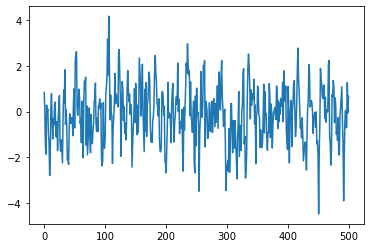

In [6]:
ys = pd.Series(SimulateAR1(numobs = 500))
ys.plot()

In [7]:
## Main

yraw = SimulateAR1(numobs = 500)

numobs = yraw.shape[0]
numreps = 10000
block = 1
values = np.empty(numreps)
ii = StationaryBootstrap(numobs, numreps, block)

for b in range(numreps):
    yart = yraw[ii[b]]
    y = yart[1:]
    x = yart[0:-1]
    reg = LinearRegression(fit_intercept=False)
    reg.fit(x.reshape(numobs-1,1), y.reshape(numobs-1,1))
    values[b] = reg.coef_[0][0]

mu = np.round(np.mean(values), 2)
sigma = np.round(np.std(values, ddof=1), 2)

In [8]:
mu, sigma

(0.0, 0.04)

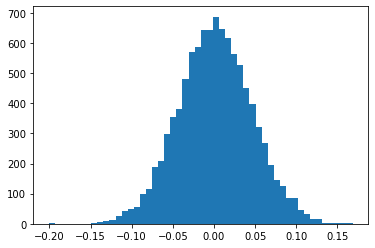

In [9]:
plt.hist(values, bins=50);

<br>

### __Python ARCH Module (Sheppard/Bashtage)__

<br>

In [ ]:
from arch.bootstrap import StationaryBootstrap, optimal_block_length

In [ ]:
opt = optimal_block_length(yraw)

In [ ]:
opt

In [ ]:
opt.columns

In [ ]:
block = opt.stationary[0]
block

In [ ]:
StationaryBootstrap?

In [ ]:
numobs = yraw.shape[0]
numreps = 10000

values = np.empty(numreps)
bs = StationaryBootstrap(block, yraw)

In [ ]:
bs.apply?

In [ ]:
for b in range(numreps):
    yart = yraw[ii[b]]
    y = yart[1:]
    x = yart[0:-1]
    reg = LinearRegression(fit_intercept=False)
    reg.fit(x.reshape(numobs-1,1), y.reshape(numobs-1,1))
    values[b] = reg.coef_[0][0]

mu = np.round(np.mean(values), 2)
sigma = np.round(np.std(values, ddof=1), 2)